In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finsim.data import get_yahoofinance_data

from lppl.fit import LPPLModel

In [2]:
symdf = get_yahoofinance_data('^GSPC', '2005-01-01', '2008-10-11')

[*********************100%***********************]  1 of 1 completed


In [3]:
symdf

,TimeStamp,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-01-03,2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000
...,...,...,...,...,...,...,...
2008-10-06,2008-10-06,1097.560059,1097.560059,1007.969971,1056.890015,1056.890015,7956020000
2008-10-07,2008-10-07,1057.599976,1072.910034,996.229980,996.229980,996.229980,7069210000
2008-10-08,2008-10-08,988.909973,1021.059998,970.969971,984.940002,984.940002,8716330000


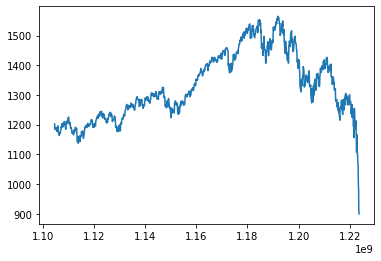

In [20]:
plt.plot(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

In [16]:
fitted_lppl_model = LPPLModel()
fitted_lppl_model.fit(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

In [19]:
print(fitted_lppl_model)

tc: 1223596815.9106998
m: 0.9
omega: 0.995287632704116
A: 7.026182608556877
B: 4.295580221699303e-08
C: 4.3901717725295146e-08
phi: 1.781772017247832e-05


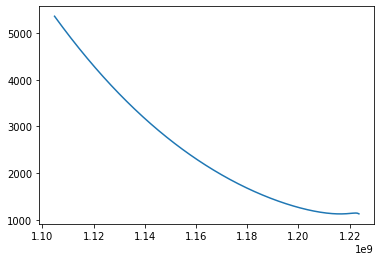

In [21]:
plt.plot(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), fitted_lppl_model(symdf['TimeStamp'].map(lambda ts: ts.timestamp())))

In [25]:
symdf['TimeStamp'].map(lambda ts: ts.timestamp()).map(lambda f: pd.Timestamp.fromtimestamp(f))

Date
2005-01-03   2005-01-02 19:00:00
2005-01-04   2005-01-03 19:00:00
2005-01-05   2005-01-04 19:00:00
2005-01-06   2005-01-05 19:00:00
2005-01-07   2005-01-06 19:00:00
                     ...        
2008-10-06   2008-10-05 20:00:00
2008-10-07   2008-10-06 20:00:00
2008-10-08   2008-10-07 20:00:00
2008-10-09   2008-10-08 20:00:00
2008-10-10   2008-10-09 20:00:00
Name: TimeStamp, Length: 951, dtype: datetime64[ns]